
 # Problem set 2 (99 pts)

## Important information

1. We provide signatures of the functions that you have to implement. Make sure you follow the signatures defined, otherwise your coding solutions will not be graded.

2. Please submit the single Jupyter Notebook file, where only Python and Markdown/$\LaTeX$
 are used. Any hand-written solutions inserted by photos or in any other way are prohibitive and will not be graded. If you will have any questions about using Markdown, ask them!

3. The works will be checked for plagiarism. The score will be divided by the number of similar works.

# Problem 1 (44 pts)

Commonly enough the matrices arising in discretisations of particular problems are not just sparse, but also possess the *banded* property i.e. a general element of $A$ be $a_{ij}$, we say that it has an *upper bandwith* of $u$ and a *lower bandwith* of $l$ iff it may only nonzero between $l$-th and $u$-th main diagonals (in other words, $a_{ij}$ may only be nonzero when $i\le j+l$ and $j\le i+ u$). 
In particular, any upper triangular matrix of size $n\times n$ has a lower bandwith of 1 and an upper bandwith of $n$. 
The goal of this task is to endow you with some understanding of this important matrix class. Keep in mind that vectors are column.

1) (1 pts) Assume you are given a dyadic matrix $xy^T$. Suppose that only $a$ leading components of $x$ and $b$ leading components of $y$ are nonzero. What are the bandwiths of this matrix?
Lets look at matrix $C=xy^T$. Here vector $\vec{x} = \begin{pmatrix} x_1 \\ x_2 \\ \cdots \\ x_a \\ 0 \\ \cdots \\ 0 \end{pmatrix}$, and  $\vec{y} = \begin{pmatrix} y_1 \\ y_2 \\ \cdots \\ y_a \\ 0 \\ \cdots \\ 0 \end{pmatrix}$ =>

$xy^T_{i,j}$ = $x_iy_j \neq 0$

if $x_i \neq 0 => i \leq 0 and x_j \neq 0 => j \leq 0 $ then our matrix have form of:

$C_{m,n} = 
 \begin{pmatrix}
  c_{1,1} & c_{1,2} & \cdots & c_{1,b} &0& \cdots&0 \\
  c_{2,1} & c_{2,2} & \cdots & c_{2,b} &0&\cdots&0\\
  \vdots  & \vdots  & \ddots & \vdots& \cdots&\cdots&\cdots \\
  c_{a,1} & c_{a,2} & \cdots & c_{a,b}&0&\cdots&0 \\
  0&0& \ddots & \vdots& \cdots&\cdots&0
 \end{pmatrix}$ => we have a for lower bandwidth and b for upper bandwidth

 2) (3 pts) Assume you are given a banded matrix $A\in\mathbb{R}^{n\times n}$ with bandwiths $l$ and $u$. Examine the bandwidths of its $L$ and $U$ factors in LU decomposition, assuming its existence. Assume that the diagonal is nonzero for simplicity of the proof.
 Lets change view of our matrix A to matrix out of 4 blocks:  
 $$b - scalar $$
 $$\vec{c}, \vec{d} - vectors$$  
 $$F - matrix$$
 then, we matrix $$A = 
 \begin{pmatrix}
 b & c^T \\
 d & F 
 \end{pmatrix}
 $$
 For such matrix we can easy write LU, so $A=LU$, if 
 $$
 L = 
 \begin{pmatrix}
 1 & 0 \\
 \frac{d}{b} & I 
 \end{pmatrix}
 $$
 $$
 U = 
 \begin{pmatrix}
 b & c^T \\
 0 & F- \frac{dc^T}{b}
 \end{pmatrix}
 $$
 To find bandwith, lets examine parts of this matrices:  
 We know, that matrix A has l, u bandwith. That means, that vector d has l leading nonzeros elements.  
 Also that means, that vector c has u leading nonzeros elements.  
 Also we know after 1.1 that C has bandwith l and u as A.  
 Now we can say, that for L: upper bandwith equal to 0
 lower bandwith is connected to nonzeros in d and equal to l  
 For U: upper bandwith is connected to nonzeros in c and equal to u
 lower bandwith equal to 0

3) (3 pts) Assume we also perform pivoting in computing PLU decomposition, so that $A\ne LU$, but rather $PA = LU$. Examine the upper bandwidth of $U$.  
Lets first look at matrix $C=PA$. Consider the matrix P. Let's collect it as a matrix in which the matrix element pij shows whether line j ends at place i. Then it is possible to choose a function f such that $C_{ij}=A_{f(c_i)j}$. On the one hand, the inequality $f(c_i)>j+l$ is true from the definition; on the other hand, if this inequality $f(c_i)>d+l$ is true for any d, then for any d the leading major minor of dimension d is singular. This implies the singularity of the matrix. We obtain the inequality eth. Thus the maximum shift for the matrix C is l, and the rightmost diagonal is u. So the upper bandwidth is equal to l+u.

4) (7 pts) Based on the intuition gained so far, propose and implement an LU algorithm for banded matrices specifically. Estimate the leading term in the complexity analysis. Pivoting is not needed.  
Let us modify the regular Gaussian elimination method so that it is suitable for this problem. We will proceed the same way as in the regular algorithm, leaving the necessary diagonals. In this way we will zero all values between the matrix boundary and the band boundary.  

In [5]:
import numpy as np

def banded_matrix_generator(size, k_upper, k_lower):

    matrix = np.random.randint(1, 10, size=(size, size))

    # Ensure the upper and lower band structure
    for i in range(size):
        for j in range(size):
            if i - j > k_upper or j - i > k_lower:
                matrix[i, j] = 0

    return matrix

def lu_decomposition_banded(matrix, k_upper, k_lower):


    # Get the dimensions of the matrix
    n = matrix.shape[0]

    # Initialize L and U matrices
    L = np.eye(n)
    U = np.zeros((n, n))

    # Perform LU decomposition
    for i in range(n):
        # Upper triangular matrix (U)
        for j in range(i, min(i + k_upper + 1, n)):
            U[i, j] = matrix[i, j] - np.dot(L[i, :i], U[:i, j])

        # Lower triangular matrix (L)
        for j in range(i + 1, min(i + k_lower + 1, n)):
            L[j, i] = (matrix[j, i] - np.dot(L[j, :i], U[:i, i])) / U[i, i]

    return L, U

# Example usage
size = 6      # size of the matrix
u = 2   # upper half-bandwidth
l = 2   # lower half-bandwidth
matrix = banded_matrix_generator(size, u, l)

print("Generated banded matrix:")
print(matrix)

L, U = lu_decomposition_banded(matrix, k_upper, k_lower)
print("\nL matrix:")
print(L)
print("\nU matrix:")
print(U)


Generated banded matrix:
[[7 8 7 0 0 0]
 [7 6 6 3 0 0]
 [3 6 8 8 3 0]
 [0 5 7 8 2 7]
 [0 0 7 5 4 4]
 [0 0 0 9 7 4]]

L matrix:
[[  1.           0.           0.           0.           0.
    0.        ]
 [  1.           1.           0.           0.           0.
    0.        ]
 [  0.42857143  -1.28571429   1.           0.           0.
    0.        ]
 [  0.          -2.5          1.21153846   1.           0.
    0.        ]
 [  0.          -0.           1.88461538 -15.28813559   1.
    0.        ]
 [  0.          -0.           0.           7.93220339  -0.74936387
    1.        ]]

U matrix:
[[  7.           8.           7.           0.           0.
    0.        ]
 [  0.          -2.          -1.           3.           0.
    0.        ]
 [  0.           0.           3.71428571  11.85714286   3.
    0.        ]
 [  0.           0.           0.           1.13461538  -1.63461538
    7.        ]
 [  0.           0.           0.           0.         -26.6440678
  111.01694915]
 [  0.       

Complexity:
We need to take n steps for multiplication and n steps for additions. The maximum number of multiplications at each step is $ul$. So for all multiplications we need maximum $nul$, the same for additioms. Thus the total complexity of the algorithm is $nul+nul=2nul$  
It is better then complexity of gaussian algorithm $O(n^3)$


5) (5 pts) Specify the above algorithm to tridiagonal matrices. Implement it and estimate complexity.

In [6]:
import numpy as np

def generate_random_banded_matrix(size, k):


    matrix = np.random.randint(1, 10, size=(size, size))

    # Ensure the band structure
    for i in range(size):
        for j in range(size):
            if abs(i - j) > k:
                matrix[i, j] = 0

    return matrix

def lu_decomposition_banded(matrix, k):


    # Get the dimensions of the matrix
    n = matrix.shape[0]

    # Initialize L and U matrices
    L = np.eye(n)
    U = np.zeros((n, n))

    # Perform LU decomposition
    for i in range(n):
        # Upper triangular matrix (U)
        for j in range(i, min(i + k + 1, n)):
            U[i, j] = matrix[i, j] - np.dot(L[i, :i], U[:i, j])

        # Lower triangular matrix (L)
        for j in range(i + 1, min(i + k + 1, n)):
            L[j, i] = (matrix[j, i] - np.dot(L[j, :i], U[:i, i])) / U[i, i]

    return L, U

# Example usage
size = 7  # size of the matrix
k = 1     # half-bandwidth
matrix = generate_random_banded_matrix(size, k)

print("Tridiagonal Matrix:")
print(matrix)

L, U = lu_decomposition_banded(matrix, k)
print("\nL matrix:")
print(L)
print("\nU matrix:")
print(U)

Tridiagonal Matrix:
[[5 4 0 0 0 0 0]
 [9 2 1 0 0 0 0]
 [0 5 7 2 0 0 0]
 [0 0 1 6 6 0 0]
 [0 0 0 8 9 5 0]
 [0 0 0 0 2 8 5]
 [0 0 0 0 0 1 9]]

L matrix:
[[ 1.          0.          0.          0.          0.          0.
   0.        ]
 [ 1.8         1.          0.          0.          0.          0.
   0.        ]
 [ 0.         -0.96153846  1.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.12560386  1.          0.          0.
   0.        ]
 [ 0.          0.          0.          1.39159664  1.          0.
   0.        ]
 [ 0.          0.          0.          0.          3.0749354   1.
   0.        ]
 [ 0.          0.          0.          0.          0.         -0.13559916
   1.        ]]

U matrix:
[[ 5.          4.          0.          0.          0.          0.
   0.        ]
 [ 0.         -5.2         1.          0.          0.          0.
   0.        ]
 [ 0.          0.          7.96153846  2.          0.          0.
   0.        ]
 [ 0.          0.  

case of a tridiagonal matrix $u=l=2$, since only those nearest to the main diagonal are filled in at the top and bottom, then these values can be substituted into the comlexity described in the assignment above, which leads to the complexity $= 2 * n * 2 *2 = 8n$.

6) (10 pts) Since we are dealing with direct inversions, we would also like to know how the banded matrices invert. In particular, we would like to know if we can say something about inverses' structure. Show that the inverse of a banded matrix is a matrix with low-rank off-diagonal blocks and estimate the ranks thereof. Assume the matrix diagonal blocks nonsingular. 
  
  
Let us imagine that we are given a matrix $A$ which is partitioned into blocks:
\
 \begin{bmatrix}
    A_{11} & A_{12} \\
    A_{21} & A_{22}
\end{bmatrix}
Then let us call its inverse matrix the matrix $B$ ($B = A^{-1}$) and also decompose it into blocks:
 \begin{bmatrix}
    B_{11} & B_{12} \\
    B_{21} & B_{22}
\end{bmatrix}
Then by multiplication we get that:
\begin{bmatrix}
    A_{11}B_{11} + A_{12}B_{21} & A_{11}B_{12} + A_{12}B_{22} \\
    A_{21}B_{11} + A_{22}B_{21} & A_{21}B_{12} + A_{22}B_{22}
\end{bmatrix} 
Which is equivalent to:
 \begin{bmatrix}
    I & 0 \\
    0 & I
\end{bmatrix}

Hence we can express from here $B_{12}$, which will be equal to $B_{12} = - A_{11}^{-1}A_{12}B_{22}$, this operation can be done for each block:
$B_{11}=A_{11}^{-1}(I- A_{12}B_{21})$, $B_{21} = - A_{22}^{-1}A_{21}B_{11}$, $B_{22}=A_{22}^{-1}(I- A_{21}B_{12})$.

Here we can use the matrix rank inequality, which looks like:

$$rank(AX)\leq\min(rank(A);rank(X))$$

In this case, we can say that for each block, the rank of the matrix is bounded by the minimum rank of the matrix to be multiplied to obtain it. That is, we can say that the rank of the inverse matrix block is less than or equal to the rank of one of the blocks of the initial matrix (depending on the considered inverse matrix block).

7) (10 pts) Finally, proof the following important fact, due to Strang: if both a matrix and its inverse are banded, then the matrix is a product of block diagonal factors; each factor is composed of $2\times2$ and $1\times1$ blocks, and the total number thereof is not dependent directly on the matrix dimension. Try to make it as convincing as you can.  
We suppose, that matrix $A$ has bradwidth $b_1$, and matrix $A^{-1}$ has $b_2$
Lest make matrix A diagonal by several steps. To simplifying description of our steps, lets take $A$ and $A^{-1}$ with bandwidth of our matrixes are $b1=b2=2$. Lets illustrate split of matrix to submatrixes by picture.  
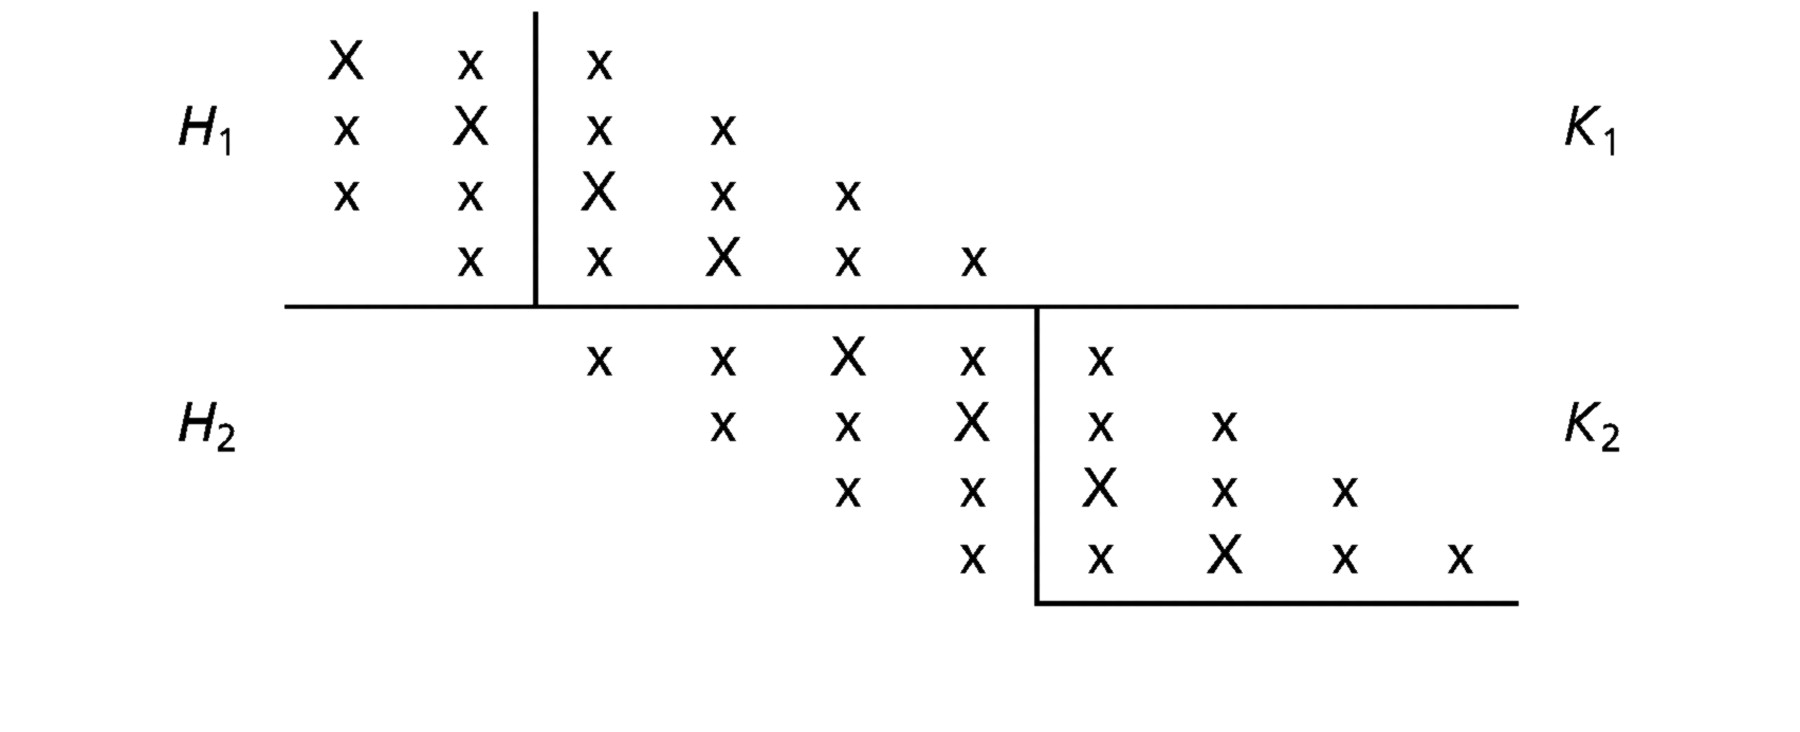
Here, all submatrices H and K of A, below the $d_2$th upper diagonal and above the $d_2$th lower diagonal, have $rank ≤ d_2$.
We seperate first $2*b2 = 4$ raws by submtrices $H_1$ and $K_1$. We know, that $rank(H_1)<= b_2$ and $rank(K_1)<= b_2$. Also thouse raws are independent, so $rank(H_1)= rank(K_1)= b_2 = 2$. Here $x$ and $X$ are nonzeros. With simply row operations we can make nonzeros in the first two diagonal positions X and zeros elsewhere in $H_1$ matrix. We know, that rows 3 and 4 of A remain independent, the new rows 3 and 4 of $K_1$ must be independent. After that by row operations we can remove rows 1 and 2 of $K_1$, without changing $H_1$. Then with operations on columns 3, 4, 5, and 6 of $A$ we can make  nonzeros in the two positions X and zeros elsewhere in $K_1$.  
Finaly for rows 5–8:
We know, that $H_2$ and $K_2$ have rank exactly $d_2$ = 2. The last two columns of the new $H_2$ are independent, because those columns were made zeros in $K_1$. We can use these columns to make zeros in the first two columns of $H_2$, without changing $K_1$. Now $H_2$ and $K_2$ are in exactly the same situation as the original $H_1$ and $K_1$.
Now we can make same operations as before on rows 5–8 of the current $A$ and on columns 7–10, to produce nonzeros only in the diagonal positions X. All row operations are left multiplications by elimination matrixes.  
Lets look at block-diagonal matrix $B_r$ - it acts on 4 raws, and block-diagonal matrix $B_c$ acts on the columns, such, that $B_{r}AB_{c}$ is diagonal. Here $B_c$ starts on column 3-6. We can execute $B_r$ and $B_c$ as block-diagonal $F_s$. Also, as we know, usual elimination steps subtract a multiple of one row or column from another for the $H_s$ and the $K_s$. So, we can make each operator by a product of 2d - 1 factors $F$ and the $“x”$ to be removed is d rows or columns away from the 1. (For d = 1, F is a Gauss matrix G with a single nonzero next to the diagonal of 1s. For d = 2, the product $F_{1}F_{2}F_{3} = PGP$ moves that nonzero by one position when the $P_s$ exchange rows and exchange columns.) Certainly $b_{2}^3$ factors will suffice to remove all the off-diagonal nonzeros in each H and K. S we proof, theorem for $b_{1}<=b_{2}$. Proof for $b_{1}>b_{2}$ is nearly the same, but we will operate with matrix $A^{-1}$. Its blocks $H$ and $K$ will have $2d_{1}$ rows. Again, it reduces to an invertible diagonal matrix $X$ by $B_r$ and $B_c$, and those factor into $F_s$. The number of $F_s$ is independent of n, and their construction still succeeds for n = ∞.

8) (5 pts) Consider the inverse matrix of a banded matrix with the strcuture from task 7); consider also the transpose thereof. Show that they share bandwidths.
As we prooved at 7), we can write matrix $A=F_{1}@F_{2}@...@F_{n}$. Lets write transpose of block-matrix(example for n=m=2)  
$$A=
\begin{bmatrix}
    A_{11} & A_{12} \\
    A_{21} & A_{22}
\end{bmatrix}
=
\begin{bmatrix}
    A_{11}^{T} & A_{12}^{T} \\
    A_{21}^{T} & A_{22}^{T}
\end{bmatrix}$$  
So $A^T=F_{1}^{T}@F_{2}^{T}@...@F_{n}^{T}$, Then bandwidth for every block is the same => mask has the same bandwidth.  
For inverse everything the same:
$$A^{-1}=F_{1}^{-1}@F_{2}^{-1}@...@F_{n}^{-1}$$ Each factor dont change bandwidth => mask has the same bandwidth.  

# Problem 2. Stability of linear least squares (25 pts)

In this task you are supposed to explore the concept of the stability of the linear least squares problem.

So you are given a matrix $A \in \mathbf{R}^{n \times m}, n > m$, the right-hand side $b \in \mathbf{R}^{n}$. And you need to find the solution $x \in \mathbf{R}^{m}$ that minimizes the residual:

$$
\Vert A x - b \Vert_2 \rightarrow \min_x.
$$

### Task 1. Theory
For all tasks here you can use spectral norm for the computation of condition number.

1. (5 pts) Condition number of a matrix affects the stability of the solution. Recall from the lecture that using a normal equation $ A^* A x = A^* b $ to solve linear least squares problem is not a good idea.
Prove that $\mathrm{cond}_2(A^* A) = \mathrm{cond}_2(A)^2$.

2. (5 pts) Derive the condition number in 2-norm for
  
   a) unitary matrix,
   
   b) normal matrix,

   c) diagonal matrix.

### Task 2. Practice (15 pts)

In this task you need to compare the relative errors of solution produced by different approaches for solving linear least squares on ill-conditioned matrices.

1. Come up with the way to construct a random $n \times m$ matrix with given condition number. Implement it in `construct_random_matrix`.

2. You need to solve linear least squares problem using four ways:
   
   a) with normal equation;
   
   b) using QR decomposition;
   
   c) using pseudoinverse (compute it yourself using SVD);
   
   d) using bigger system of equations
   
   $$ \begin{pmatrix} 0 & A^* \\ A & -I \end{pmatrix} \begin{pmatrix} x \\ r \end{pmatrix} = \begin{pmatrix} 0 \\ b \end{pmatrix}, $$
   
    where $r = Ax - b$.

3. With the growth of condition number show the growth of the relative error $\frac{\Vert \hat{x} - x \Vert}{\Vert x \Vert}$ between the initial solution $x$ and the solution $\hat{x}$ of the perturbed system $Ax = b + \Delta b$. Show that for the normal equation the dependence is quadratic w.r.t condition number, while for the other methods it is linear. Plot the resulting dependence (error vs condition number) and comment on results. Ensure that your plots are interpretable.

4. In general, the setup of your experiment should be the following:
 - Generate a random matrix $A$ and a vector $x_\text{true}$.
 - Compute the correct right-hand side $b$.
 - Solve the resulting system $Ax = b$ to get $x$.
 - Perturb the system $Ax = b + \Delta b$ and get new solution $\hat{x}$. The perturbation $\frac{\Vert \Delta b \Vert}{\Vert b \Vert}$ should be small.

You are free to use `numpy` or `jax`.

1. (5 pts) Condition number of a matrix affects the stability of the solution. Recall from the lecture that using a normal equation $ A^* A x = A^* b $ to solve linear least squares problem is not a good idea.
Prove that $\mathrm{cond}_2(A^* A) = \mathrm{cond}_2(A)^2$.  
  
Let's write out the definition of the сondition number:
$$\mathrm{cond}_2(A)=||A||_2 ||A^{-1}||_2=\frac{\sigma_{max}}{\sigma_{min}}$$
Also, we can write $A$ as:  
$$A=U\Sigma V^{*}$$  
Then we can write:
$$A^{*}A=V\Sigma^{*} U^{*} U \Sigma V^{*}= V \Sigma^{*} \Sigma V^{*}$$
That means, that $\sigma_{max}=\sigma_{max_A}^2$

2. (5 pts) Derive the condition number in 2-norm for
  
   a) unitary matrix, by definition $A^*A = AA^* =I$  



Lets use, that $\mathrm{cond}_2(A^* A) = \mathrm{cond}_2(A)^2$  
$A^*A = I$, so $\mathrm{cond}_2(A^* A) = 1$, then obviosly $\mathrm{cond}_2(A) = 1$

   b) normal matrix, by definition $A^*A = AA^*$, then we can write:
   $$v^*\Sigma^* \Sigma v=u^*\Sigma \Sigma^* u^{*}$$
   Then we can prove, that $u=v$  
   That means, that from eigenvalue decomposition, we can write $\sigma^2=\lambda$
   Then $\mathrm{cond}_2(A) = \frac{\lambda_{max}}{\lambda_{min}}$
   

   c) diagonal matrix.  
     
for diagonal matrix it is true, that for svd: $D=IDI$, then as at last point from eigenvalue decomposition:
$\mathrm{cond}_2(A) = \frac{d_{max}}{d_{min}}$

Lets write several defs, first one for making random matrix with known size and condition number.

In [9]:
import numpy as np


def construct_random_matrix(n, m, condition):
    """
    Making matrix with sizes n*m with condition number = condition

    n, m -- matrix d
    condition -- condition number
    """
    matrix = np.random.random(size=(n, m))
    U, Sigma, V = np.linalg.svd(matrix, full_matrices=False)
    sigma_max = np.max(Sigma)
    sigma_min = sigma_max / condition
    Sigma = np.sort(sigma_min + (sigma_max - sigma_min) * np.random.rand(min(m, n)))[::-1]
    Sigma[0] = sigma_max
    Sigma[min(m, n) - 1] = sigma_min
    return np.dot(U * Sigma, V)

In [10]:
def normal_equation_solving(A, b):
    """
    Solving with normal equation, gives vector x
    
    A -- matrix A from Ax=b
    b -- vector b
    """
    A_c = A.T @ A
    b_c = A.T @ b
    return np.linalg.solve(A_c, b_c)

In [11]:
def qr_solver(A, b):
    """
    Solving with qr, gives vector x
    
    A -- matrix A from Ax=b
    b -- vector b
    """
    Q, R = np.linalg.qr(A)
    A_c = R
    b_c = Q.T @ b
    return np.linalg.solve(A_c, b_c)

In [257]:
def pseudo_solver(A, b):
    """
    Solving with pseudo, gives vector x
    
    A -- matrix A from Ax=b
    b -- vector b
    """
    B = A.copy()
    C = np.linalg.pinv(B,rcond=1e-15)
    U, Sigma, V = np.linalg.svd(C, full_matrices=False)
    A_p = np.dot(np.dot(U, np.diag(Sigma)), V)
    x = np.dot(A_p, b)
    return x

In [258]:
def solve_ext_sys(A, b):
    """
    Solving with bigger system, gives vector x
    
    A -- matrix A from Ax=b
    b -- vector b
    """
    n, m = A.shape
    larger_system_matrix = np.block([[np.zeros((m, m)), A.T], [A, -np.eye(n)]])
    larger_system_rhs = np.concatenate([np.zeros(m), b])
    larger_system_solution = np.linalg.solve(larger_system_matrix, larger_system_rhs)
    return larger_system_solution[:m]

In [259]:
def error(x, x_p):
    return np.linalg.norm(x_p-x, ord=2)/ np.linalg.norm(x, ord=2)

lets try all methods

In [260]:
n = 150
m = 100
condition = np.random.random() * 200
condition=200
A = construct_random_matrix(n, m, condition)
x_true = np.random.random(size=(m, ))
b = A @ x_true


lets add perturbation

In [261]:
k = 1e-4
p = np.random.random(size=(n))
b_p = b +k/np.linalg.norm(p, ord=2)
print(np.linalg.norm(b_p-b, ord=2)/np.linalg.norm(b, ord=2))

5.102062599896254e-07


In [262]:

x_norm = normal_equation_solving(A, b)
x_norm_p = normal_equation_solving(A, b_p)
x_qr = qr_solver(A, b)
x_qr_p = qr_solver(A, b_p)
x_ps = pseudo_solver(A, b)
x_ps_p = pseudo_solver(A, b_p)
x_big = solve_ext_sys(A, b)
x_big_p = solve_ext_sys(A, b_p)
print('Norm', error(x_norm, x_norm_p))
print('QR',  error(x_qr, x_qr_p))
print('Pseudoinverse', error(x_ps, x_ps_p))
print('Big', error(x_big, x_big_p))

Norm 5.82006201196884e-07
QR 5.820058703850441e-07
Pseudoinverse 5.820058695683337e-07
Big 5.820058696643914e-07


Now lets plot error from condition number

In [263]:
conditions = np.arange(1, 200000000, 10000000)
YS=500
norm_error_mean = np.zeros((len(conditions), ))
qr_error_mean = np.zeros((len(conditions), ))
for i in range(len(conditions)):
    norm_error = 0
    qr_error = 0
    for j in range(YS):
        A = construct_random_matrix(n, m, conditions[i])
        x_true = np.random.random(size=(m, ))
        b = A @ x_true
        p = np.random.random(size=(n))
        b_p = b + k/np.linalg.norm(p, ord=2)
        #I need to add little  noise to b, or I have singular matrix error
        x_norm = normal_equation_solving(A, b+0.00000001*np.random.rand(n, ))
        x_norm_p = normal_equation_solving(A, b_p)
        x_qr = qr_solver(A, b)
        x_qr_p = qr_solver(A, b_p)
        
        norm_error += error(x_norm, x_norm_p)
        qr_error += error(x_qr, x_qr_p)
    norm_error_mean[i] = norm_error/YS
    qr_error_mean[i] = qr_error/YS

Text(0.5, 0, '$cond_2(A)$')

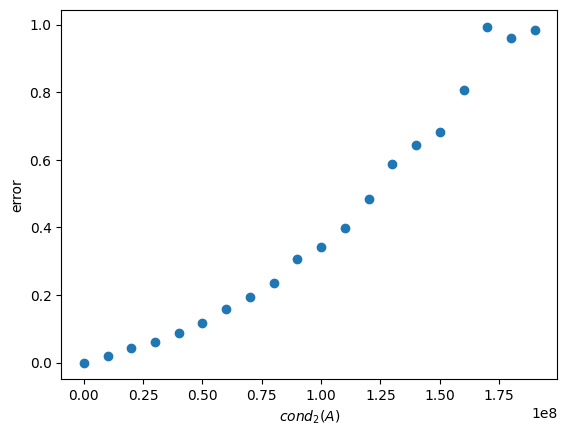

In [264]:
import matplotlib.pyplot as plt
plt.scatter(conditions, norm_error_mean)
plt.ylabel('error')
plt.xlabel(r'$cond_2(A)$')

Text(0.5, 0, '$cond_2(A)$')

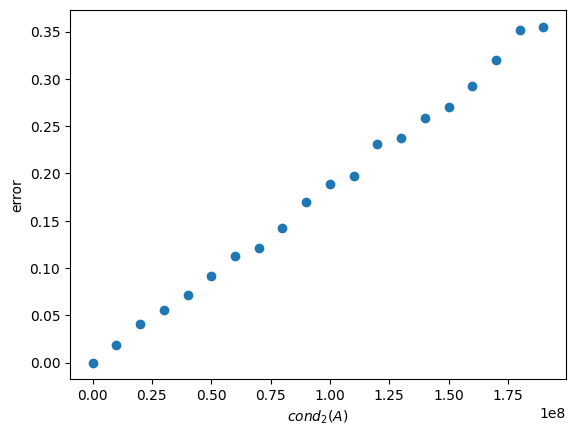

In [265]:
plt.scatter(conditions, qr_error_mean)
plt.ylabel('error')
plt.xlabel(r'$cond_2(A)$')

# Problem 3 (30 pts)

A generalisation of the eigenvalue problem is the generalised eigenvalue problem; if an eigenpair satisfies 
$$ Av = \lambda v,$$
then a generalised eigenvalue for a pair $(A,B)$ of matrices makes the matrix 
$$A-\lambda B$$ 
degenerate.
The generalised eigenvector satisfies $Av = \lambda Bv$. In this task we consider matrices $A,B$ are of size  $n\times n$.

## Task 1 (4 pts)

How many generalised eigenvalues are there for each of the following matrix pairs? Find all, if you can:

  1. $$ A = \begin{bmatrix} 1 & 2 \\ 0 & 3 \end{bmatrix}, \quad B = \begin{bmatrix} 1 & 0 \\ 0& 1 \end{bmatrix} $$ 

  2. $$ A = \begin{bmatrix} 1 & 2 \\ 0 & 3 \end{bmatrix}, \quad B = \begin{bmatrix} 1 & 0 \\ 0& 0 \end{bmatrix} $$
  
  3. $$ A = \begin{bmatrix} 1 & 2 \\ 0 & 3 \end{bmatrix}, \quad B = \begin{bmatrix} 0 & 1 \\ 0& 0 \end{bmatrix} $$
  
  4. $$ A = \begin{bmatrix} 1 & 2 \\ 0 & 0 \end{bmatrix}, \quad B = \begin{bmatrix} 1 & 0 \\ 0& 0 \end{bmatrix} $$

## Task 2 (2 pts)

Assume $\mu$ is not a generalised eigenvalue of $(A,B)$. How are spectra of $(A,B)$ and $((A-\mu B)^{-1}A,(A-\mu B)^{-1}B)$ related?

## Task 3 (24 pts)

To solve the complete generalised eigenvalue problem, [QZ algorithm](https://link.springer.com/content/pdf/10.1007/3-540-28502-4_2) can be used. This algorithm is the direct generalization of the QR algorithm for the standard eigenvalue problem. 
However, in this task we focus on the partial generalised eigenvalue problem and its application to the canonical correlation analysis.

You can test the algorithms in the further tasks only for the symmetric matrices $A$ and symmetric positive definite matrices $B$.

### From power method to its generalisation form

In order to recover the largest generalised eigenvalue and the corresponding eigenvector, one can note that

$$Av = \lambda Bv$$

is equivalent to

$$B^{-1}Av = \lambda v.$$

Therefore, one has to use the power method to $B^{-1}A$ with a random initialisation. 
However, it may be rather expensive to invert $B$ explicitly.
Therefore, we would like to avoid doing that and inexactly apply $B^{-1}$ through the solving linear system $Bx = y$.
Implement the resulting algorithm based on this idea, verify its convergence speed and check that the generalised eigenvalue relation holds.

Important notes that will help you successfully update the classical power method:
 
1) think about how the normalization step should be changed, the energy norm definition $\|x\|^2_A = x^\top A x$ can help in the proper reformultation

2) think how the step $x_{k+1}= Ax_k$ will be updated with the aforementioned notes regarding operations with matrix $B$ 

### From *block* power method to its generalisation form

Just as in the regular eigenvalue case, generalised eigenvalues can be extended to block power method (which can yield the QZ algoritm, analogously to emergence of QR in the regular case). 
The extension is straightforward and consists of replacing vectors with matrices corresponding to the $k$ largest  generalised eigenvectors. 
Moreover, since orthogonality is reqiored, a routine for enforcing orthogonality of the iterates is also needed. Implement the block power method for the generalised eigenvalue problem. 
Pay special attention how the orthogonalisation procedure shown be changed to take into account the matrix $B$.
Separately implement the proper orthoghonalisation algorithm and use it in your code for the target block power method.
Test convergence speed and check that results satisfy the target equation.

In addition, you can check the correctness of your result with ```scipy.linalg.eigh``` function with proper argumets.

### Application of the generalised eignevalue problem to the canonical correlation analysis

When one studies two datasets, it may be desirable to find the orthogonal (in the sense of the inner products induced by the correlation matrices) bases of spaces that capture linear combinations of features that are most correlated between the two datasets. 
Such a problem is called the problem of **canonical correlation analysis** and can be formulated as finding such a sequence $\{(\phi_i, \psi_i)\}$ that for data matrices $X\in\mathbb{R}^{n\times a}, Y\in\mathbb{R}^{n\times b}$

$$(\phi_i, \psi_i)\in \arg\max_{\phi, \psi} \phi^TS_{xy}\psi$$

Subject to:

$$\|\phi\|_{S_x} = \|\psi\|_{S_y} = 1$$

$$\langle\phi, \phi_j\rangle_{S_x} = 0 \quad \forall j<i$$


$$\langle\psi, \psi_j\rangle_{S_y} = 0 \quad \forall j<i,$$

where $\|\cdot\|_A$ is the energy norm induced by $A$, $\langle\cdot,\cdot\rangle_A$ is the inner product induced by $A$, $S_y = \frac{1}{n}Y^\top Y$, $S_x = \frac{1}{n}X^\top X$, $S_{xy} = \frac{1}{n}X^\top Y$

We are asked to find two bases of the maximal-cross-correlation subspace, both orthogonal in the inner product induced by the correlation matrix of the appropriate dataset.

Consider firstly the problem of simply finding a basis of the described space, subject only to unit-vector conditions (since orthogonalisation can always be carried out separately). 
The Lagrangian will then read:

$$L(\phi, \psi, \lambda, \mu) = \phi^TS_{xy}\psi-\lambda(\phi^TS_x\phi-1)-\mu(\psi^TS_y\psi-1),$$

where $\lambda$ and $\mu$ are dual variables.

From the stationarity of Lagrangian with respect ot the original variables $\psi$ and $\phi$ follows the following equation on the dual varibles

$$S_{xy}\psi = \lambda S_x\phi$$

$$S_{yx}\phi = \mu S_y\psi$$

Note that

$$\|\phi\|_{S_x} = \phi^TS_x\phi = \frac{1}{\lambda}\phi^T S_{xy}\psi = \frac{1}{\lambda} \psi^TS_{yx}\phi = \frac{\mu}{\lambda}\psi^TS_y\psi = \frac{\mu}{\lambda}\|\psi\|_{S_y} = \frac{\mu}{\lambda} = 1,$$

Therefore $\mu=\lambda$ and the equations above can be simplified in the following way

$$S_{xy}\psi = \lambda S_x\phi$$

$$S_{yx}\phi = \lambda S_y\psi$$

and the problem admits a block representation:

$$\begin{bmatrix}0 & S_{xy} \\ S_{yx} & 0\end{bmatrix}\begin{bmatrix}\phi\\\psi\end{bmatrix} = \lambda \begin{bmatrix}S_x & 0 \\ 0 & S_y\end{bmatrix}\begin{bmatrix}\phi\\\psi\end{bmatrix}. $$

Surprisingly, this problem has the form of the generalised eigenvalue problem. 
Therefore, the target vectors can be found as the leading eigenvectors and will be an orthonormal basis.

You need to implement the algorithm for extracting $k$ vectors $\psi_i, \phi_i$ from the given data matrices $X \in \mathbb{R}^{n \times d_1}$ and $Y \in \mathbb{R}^{n \times d_2}$.
You should use the power method from the previous task and take into account the special structure of the matrices $(A, B)$ coming from the original problem statment. Please, use this structure for efficient implementation of the internal steps.

## Task1 
Lets use definition to calculate:
 

1. From definition, lets find $\lambda$ from $A-\lambda B$
 
$ (1-\lambda)(3 - \lambda) = 0$, then we can see, that $ \lambda_1 = 3$ and $ \lambda_2 = 1$ 
So there are two different $\lambda$
 
2. Lets use formula $$Ax = \lambda B x$$ 
 
$$ \begin{bmatrix} 1 & 2 \\ 0 & 3 \end{bmatrix} \begin{bmatrix} x_1  \\ x_2  \end{bmatrix}  = \begin{bmatrix} \lambda x_1  \\ 0  \end{bmatrix} $$  
then  
$$ x_1+2x_2 = \lambda x_1$$
$$ 0x_1+3x_2 = 0 => x_2=0$$
$$ x_1 = \lambda x_1$$ 
 
$$\lambda=1$$ 

So there is one $\lambda$

 
3. Lets make the same trick for this task: 
 
$$ \begin{bmatrix} 1 & 2 \\ 0 & 3 \end{bmatrix} \begin{bmatrix} x_1  \\ x_2  \end{bmatrix}  = \begin{bmatrix} \lambda x_2  \\ 0  \end{bmatrix}, $$ 
 
Solution for this equation is $x = (0,0)$, so it doesn't depend on $\lambda$. So the answer is 0 by definition.
 
4. 
 
$$ \begin{bmatrix} 1 & 2 \\ 0 & 0 \end{bmatrix} \begin{bmatrix} x_1  \\ x_2  \end{bmatrix}  = \begin{bmatrix} \lambda x_2  \\ 0  \end{bmatrix}, $$ 
 
$$ x_1+2x_2 = \lambda x_1$$ 
 
Answer $\lambda$ can be any real number.

## TASK 2

We can write these matrices in general form for common eigenvalues:

$$(A - \mu B)^{-1}Av = \lambda(A - \mu B)^{-1}Bv$$


By the way, this matrix is not expressed since $\mu$ is not an eigenvalue. We can also transform the above expression:
$$(A - \mu B)^{-1}Av -\lambda(A - \mu B)^{-1}Bv = 0$$
$$(A - \mu B)^{-1}v(A-\lambda B)=0$$
After that as described above in this case we obtain that this expression does not depend on the matrix $(A - \mu B)^{-1}$ since in our case it is not equal to 0, but depends on $(A-\lambda B)$ from which we can conclude that spectra $(A,B)$ and $((A-\mu B)^{-1}A,(A-\mu B)^{-1}B)$ are equal to each other.

- You are further asked to test the developed algorithm on an arbitrary splitting of the MNIST dataset (import it from [keras](https://keras.io/api/datasets/mnist/), [PyTorch](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST), etc). Test different values of $k$.
- In addition, test it on synthetic data of known covariance. 
You can generate bivariate data with known covariance matrix through the multiplication of vectors from standard normal distribution by the Cholesky factor of the desired covariance matrix.
Then split the generated bivaritate data into two univariate vectors. Run the prepared code and comment on the obtained results.

## task 3

In [266]:
import numpy as np
from scipy.linalg import solve

def canonical_correlation_analysis(X, Y, k):
    n, d1 = X.shape
    _, d2 = Y.shape

    Sx = (1/n) * X.T @ X
    Sy = (1/n) * Y.T @ Y
    Sxy = (1/n) * X.T @ Y
    Syx = (1/n) * Y.T @ X

    A = np.block([[np.zeros((d1, d1)), Sxy],
                  [Syx, np.zeros((d2, d2))]])

    B = np.block([[Sx, np.zeros((d1, d2))],
                  [np.zeros((d2, d1)), Sy]])

    psi = np.random.rand(d1 + d2)
    phi = np.random.rand(d1 + d2)

    for i in range(k):
        # Power method for the generalized eigenvalue problem
        psi = power_method(A, B, psi)
        phi = power_method(A.T, B.T, phi)

        # Normalize vectors
        psi /= np.linalg.norm(psi)
        phi /= np.linalg.norm(phi)

    lambda_values = np.sqrt(np.dot(psi, A @ psi) / np.dot(phi, B @ phi))

    return lambda_values, psi[:d1], phi[:d2]

def power_method(A, B, x, max_iter=1000, tol=1e-6):

    for k in range(max_iter):
        # Solve the linear system By = x
        y = solve(B, x)
        
        # Compute x_{k+1} = A*y
        x = A @ y
        
        # Normalize using the energy norm
        norm_A = np.sqrt(x.T @ A @ x)
        x = x / norm_A
        
        # Step 3: Convergence Check
        lambda_estimate = x @ A @ x / (x @ B @ x)
        if k > 0 and np.abs(lambda_estimate - lambda_prev) < tol:
            break
        
        lambda_prev = lambda_estimate
    
    return x

# Example usage
n = 100
d1 = 3
d2 = 4
X = np.random.rand(n, d1)
Y = np.random.rand(n, d2)
k = 1000

lambda_values, psi, phi = canonical_correlation_analysis(X, Y, k)
print("Canonical Correlation Coefficients:", lambda_values)
print("Canonical Vectors (psi):", psi)
print("Canonical Vectors (phi):", phi)

Canonical Correlation Coefficients: 0.8584665066757228
Canonical Vectors (psi): [0.30428246 0.28995453 0.28502877]
Canonical Vectors (phi): [0.29519187 0.28129199 0.27651339 0.46256791]


In [ ]:
# Your code is here